<a href="https://colab.research.google.com/github/aneesha-needamangala/endangered-language-data-analysis/blob/main/AbramsStrogatzModelResearchProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

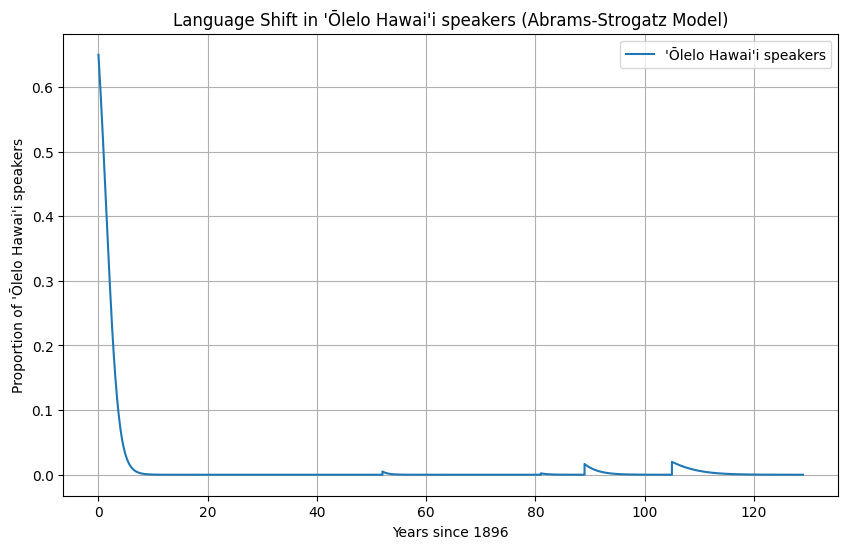

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def simulate_language_shift(x0, s, a, years, dt):
  steps = (int)(years / dt)
  x_values = [x0]
  time_values = [0]

  x = x0

  for step in range(steps):
    dxdt = s * (x ** a) * (1-x) - (1 - s) * ((1-x) ** a) * x
    x = x + dxdt * dt
    x_values.append(x)
    time_values.append((step + 1) * dt)

  return time_values, x_values

a = 1.3
dt = 0.1

periods = [(52, 0.0625, 0.65), (29, 0.05, 0.005), (8, 0.2125, 0.00215), (16, 0.4625, 0.0166), (24, 0.6, 0.02)]

all_time = []
all_x = []

current_time_offset = 0

for years, s, x0 in periods:
  t, x_vals = simulate_language_shift(x0, s, a, years, dt)
  shifted_t = [time + current_time_offset for time in t]
  all_time.extend(shifted_t)
  all_x.extend(x_vals)
  x0 = x_vals[-1]
  current_time_offset += years

plt.figure(figsize=(10, 6))
plt.plot(all_time, all_x, label="'Ōlelo Hawai'i speakers")
plt.xlabel("Years since 1896")
plt.ylabel("Proportion of 'Ōlelo Hawai'i speakers")
plt.title("Language Shift in 'Ōlelo Hawai'i speakers (Abrams-Strogatz Model)")
plt.grid(True)
plt.legend()
plt.show()